In [1]:
import pandas as pd

data = pd.read_csv('data/BTC-USD.csv')

# 计算20天的简单移动平均线
data['SMA_20'] = data['close'].rolling(window=20).mean()

# 计算相对强弱指数（RSI）
delta = data['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
data['RSI_14'] = 100 - (100 / (1 + gain / loss))


In [2]:
data.to_csv('data/BTC-USD.csv',index=False)

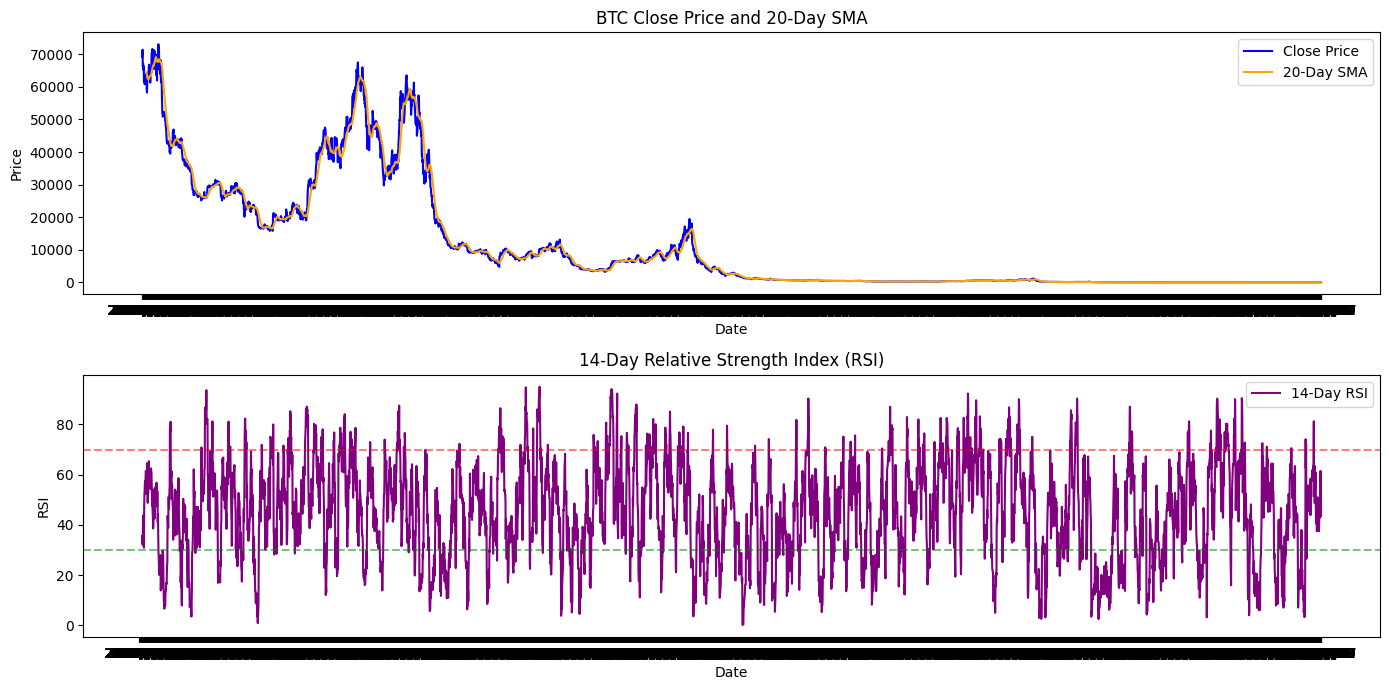

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# 绘制收盘价和SMA
plt.figure(figsize=(14,7))
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['close'], label='Close Price', color='blue')
plt.plot(data['time'], data['SMA_20'], label='20-Day SMA', color='orange')
plt.title('BTC Close Price and 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 绘制RSI
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['RSI_14'], label='14-Day RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# 过滤出2021-2023年的数据
start_date = '2021-01-01'
end_date = '2023-12-31'
data = data[(data['time'] >= start_date) & (data['time'] <= end_date)]

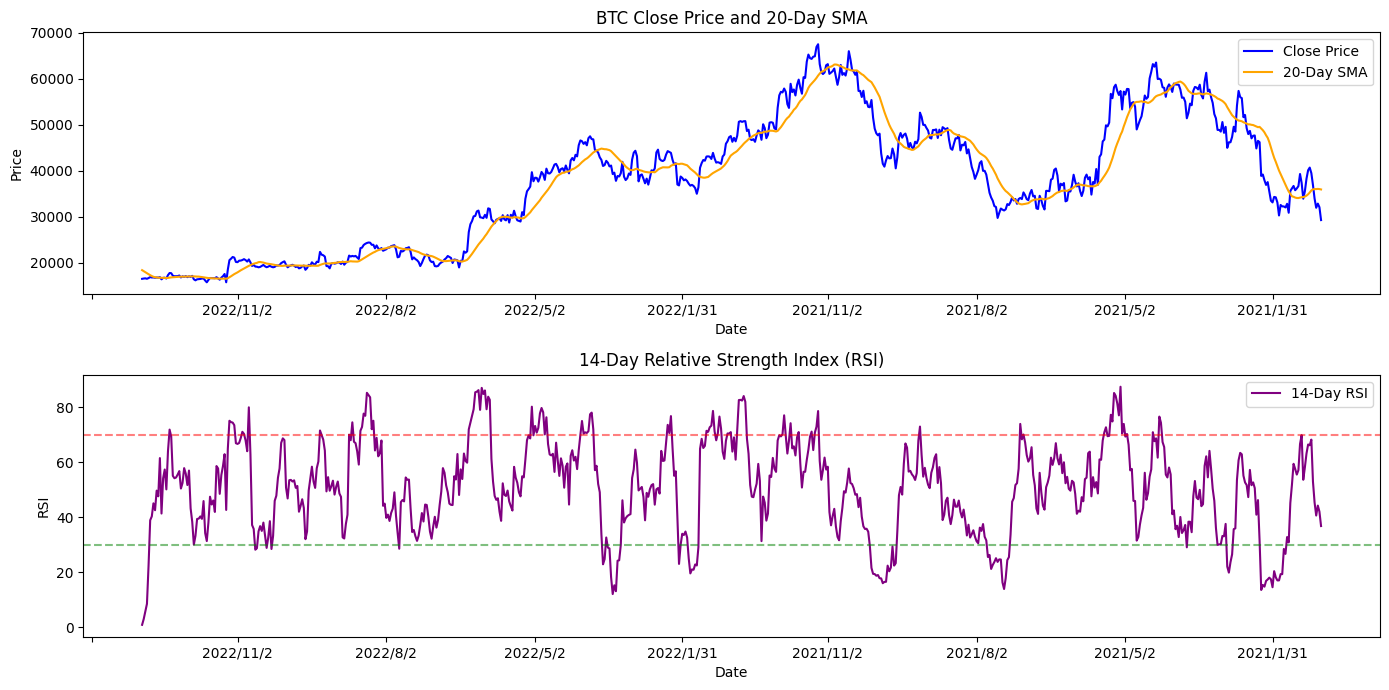

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 绘制收盘价和SMA
plt.figure(figsize=(14,7))
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['close'], label='Close Price', color='blue')
plt.plot(data['time'], data['SMA_20'], label='20-Day SMA', color='orange')
plt.title('BTC Close Price and 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 设置日期格式和刻度间隔
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每隔3个月显示一次

# 绘制RSI
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['RSI_14'], label='14-Day RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每隔3个月显示一次

plt.tight_layout()
plt.show()

C:\Users\ALLEN AN\AppData\Local\Temp\ipykernel_16856\3244614794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


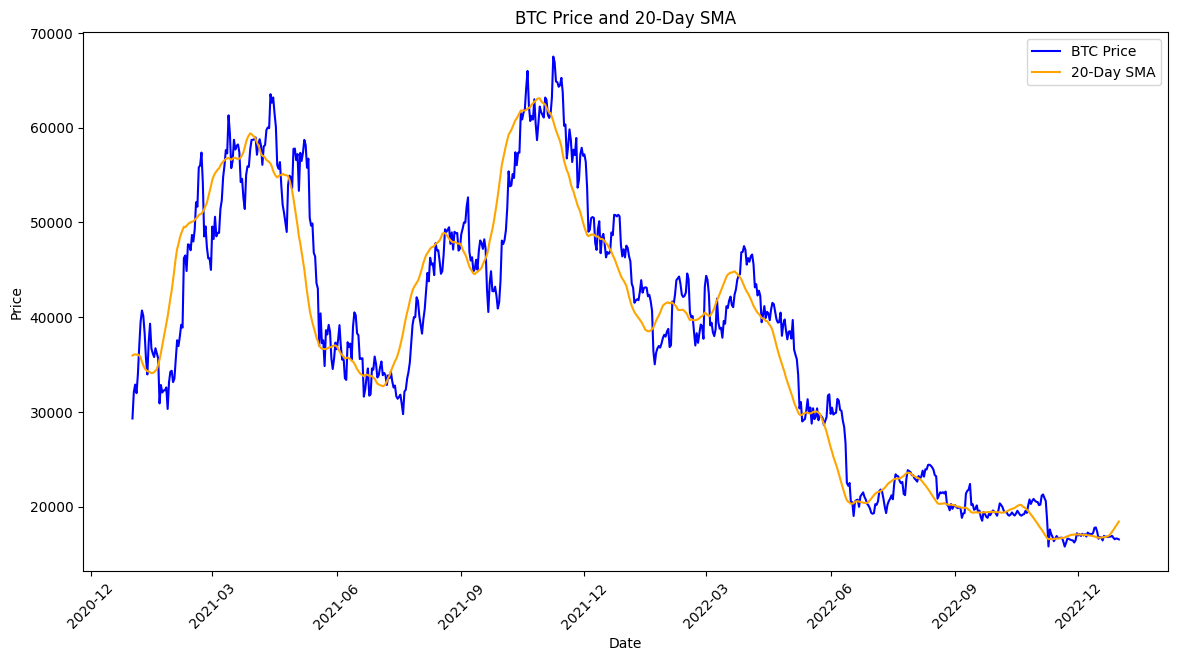

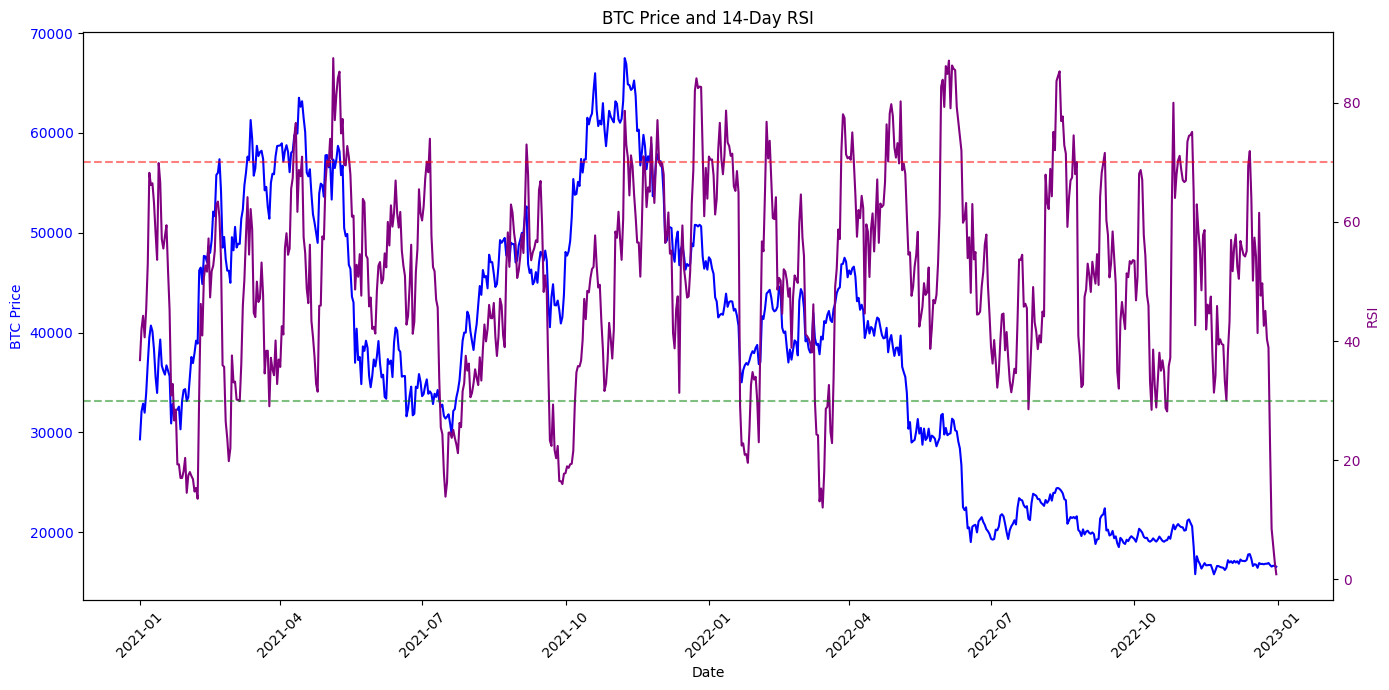

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 确保时间列是datetime格式
data['time'] = pd.to_datetime(data['time'])

# 绘制BTC价格与SMA结合的图像
plt.figure(figsize=(14, 7))
plt.plot(data['time'], data['close'], label='BTC Price', color='blue')
plt.plot(data['time'], data['SMA_20'], label='20-Day SMA', color='orange')
plt.title('BTC Price and 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每隔3个月显示一次日期
plt.xticks(rotation=45)
plt.show()

# 绘制BTC价格与RSI结合的图像
fig, ax1 = plt.subplots(figsize=(14, 7))

# 绘制BTC价格
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price', color='blue')
ax1.plot(data['time'], data['close'], label='BTC Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 设置X轴的日期格式
plt.xticks(rotation=45)

# 绘制RSI在第二个Y轴
ax2 = ax1.twinx()  
ax2.set_ylabel('RSI', color='purple')
ax2.plot(data['time'], data['RSI_14'], label='14-Day RSI', color='purple')
ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
ax2.axhline(30, linestyle='--', alpha=0.5, color='green')
ax2.tick_params(axis='y', labelcolor='purple')

plt.title('BTC Price and 14-Day RSI')
fig.tight_layout()
plt.show()
